In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
tf.enable_eager_execution()
tf.VERSION

'1.12.0'

In [2]:
import pathlib

DATADIR = 'D:/257_data/labeling_data'
data_root = pathlib.Path(DATADIR)

In [3]:
for item in data_root.iterdir():
  print(item)

D:\257_data\labeling_data\Annotations
D:\257_data\labeling_data\Images


In [4]:
all_image_paths = list(data_root.glob('*/*/*/*/*.jpg'))
all_image_paths = [str(path) for path in all_image_paths]
# random.shuffle(all_image_paths)

all_xml_paths = list(data_root.glob('*/*/*/*/*.xml'))
all_xml_paths = [str(path) for path in all_xml_paths]
# random.shuffle(all_xml_paths)

image_count = len(all_image_paths)
xml_count = len(all_xml_paths)
image_count + xml_count

500

In [5]:
all_image_paths[:10] + all_xml_paths[:10]

['D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\100p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\101p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\102p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\103p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\104p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\105p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\106p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\107p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\108p.jpg',
 'D:\\257_data\\labeling_data\\Images\\users\\kles90105\\257_data_set\\109p.jpg',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\100p.xml',
 'D:\\257_data\\labeling_data\\Annotations\\users\\kles90105\\257_data_set\\101p.xml',
 'D:\\

In [6]:
import IPython.display as display

def caption_image(image_path):
    image_rel = pathlib.Path(image_path).relative_to(data_root)
    return image_rel
    

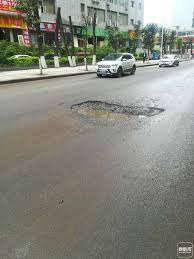

Images\users\kles90105\257_data_set\149p.jpg


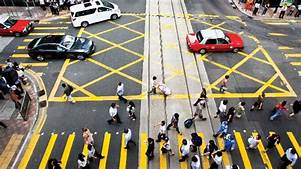

Images\users\kles90105\257_data_set\42n.jpg


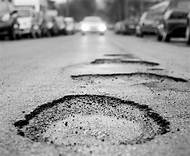

Images\users\kles90105\257_data_set\167p.jpg


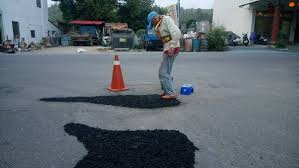

Images\users\kles90105\257_data_set\142p.jpg


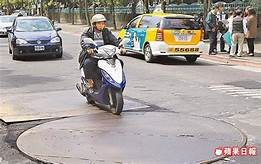

Images\users\kles90105\257_data_set\16n.jpg


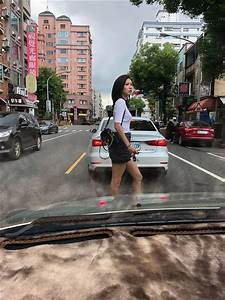

Images\users\kles90105\257_data_set\58n.jpg


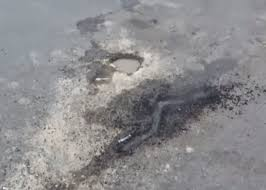

Images\users\kles90105\257_data_set\147p.jpg


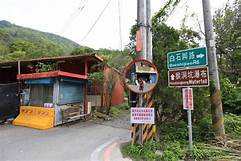

Images\users\kles90105\257_data_set\6n.jpg


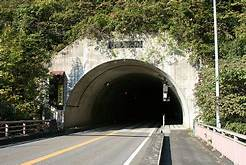

Images\users\kles90105\257_data_set\28n.jpg


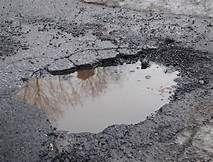

Images\users\kles90105\257_data_set\163p.jpg


In [8]:
import random

for n in range(10):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(caption_image(image_path))

In [9]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['Annotations', 'Images']

In [11]:
import xml.etree.ElementTree as ET
import numpy as np
from array import *
from PIL import Image
import uuid

def xml_tree(x):
    for child in x:
        if(child.getchildren() == []):
            print(child.tag, ":", child.text)
        else:
            print(child.tag)
            xml_tree(child)

for i in range(len(all_image_paths)):
    tree = ET.parse(all_xml_paths[i])
    root = tree.getroot()
    xml_tree(root)
    print("")

    objs = root.findall("./object")

    url = 'D:/257_data/labeling_data/Images/users/kles90105/257_data_set/' + root.find("./filename").text

    x_list = []
    y_list = []
    i = 0
    for co in objs:
        print(co.find("./name").text)
        for node in co.findall("./polygon/pt"):
            print("point")
            children = node.getchildren()
            x = children[0].text
            y = children[1].text
            x_list.append(int(float(x)))
            y_list.append(int(float(y)))
            print(int(float(x)), int(float(y)))
        print("top-left", min(x_list), min(y_list))
        print("bottom-right", max(x_list), max(y_list))
        print()
    
        im = Image.open(url) 
        outfile = '%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
        im.crop((min(x_list), min(y_list), max(x_list), max(y_list))).save(outfile)
        print("Save as:", outfile)
        print()
        
        x_list = []
        y_list = []
    

filename : 100p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 250
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:01:53
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 25
y : 128
pt
x : 137
y : 128
pt
x : 137
y : 160
pt
x : 25
y : 160

pothole4
point
25 128
point
137 128
point
137 160
point
25 160
top-left 25 128
bottom-right 137 160

Save as: pothole4-e91c1fae-3adc-4ace-95ca-d1b0c3dcb0c0.png
filename : 101p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 167
ncols : 225
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:33:40
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 68
y : 57
pt
x : 138
y : 57
pt
x : 138
y : 121
pt
x : 68
y : 121

pothole4
point
68 57
point
138 57
po

Save as: pothole1-14e31373-0ddb-454f-bd07-c84aff9de260.png
pothole1
point
28 59
point
207 59
point
207 77
point
28 77
top-left 28 59
bottom-right 207 77

Save as: pothole1-7533f42c-2b27-40fa-ac62-67dbbef6b6c8.png
filename : 112p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 193
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:04:58
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 28
y : 47
pt
x : 149
y : 47
pt
x : 149
y : 111
pt
x : 28
y : 111

pothole4
point
28 47
point
149 47
point
149 111
point
28 111
top-left 28 47
bottom-right 149 111

Save as: pothole4-c929566a-3076-4c42-8b3e-97d94271981f.png
filename : 113p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 178
ncols : 249
object
name : pothole1
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : No

Save as: pothole1-ca283b31-59a2-4c69-9983-85f0e93ff326.png
filename : 119p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 175
ncols : 233
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:05:48
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 194
y : 76
pt
x : 27
y : 76
pt
x : 27
y : 36
pt
x : 194
y : 36

pothole4
point
194 76
point
27 76
point
27 36
point
194 36
top-left 27 36
bottom-right 194 76

Save as: pothole4-e9efb446-bc47-42af-88db-7e094dddf9a3.png
filename : 11n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 153
ncols : 229
object
name : pothole0
deleted : 0
verified : 0
occluded : yes
attributes : shadow
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:03:20
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 15
y : 91
pt
x : 160
y : 91
pt
x : 160
y : 134
pt
x :

Save as: pothole1-4d184ed1-4ab9-4ac4-adbc-d07ac15cefb3.png
filename : 128p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 242
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:07:51
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 103
y : 105
pt
x : 2
y : 105
pt
x : 2
y : 37
pt
x : 103
y : 37

pothole4
point
103 105
point
2 105
point
2 37
point
103 37
top-left 2 37
bottom-right 103 105

Save as: pothole4-3a076725-3f3f-4534-9bef-0821bf25b5cf.png
filename : 129p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 900
ncols : 1600
object
name : pothole1
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:48:17
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 974
y : 718
pt
x : 1472
y : 718
pt
x : 1472
y : 843
p

Save as: pothole4-d33577c0-dfda-4272-bb0a-66a5aac2286d.png
filename : 136p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 259
ncols : 194
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:57:08
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 39
y : 230
pt
x : 105
y : 230
pt
x : 105
y : 258
pt
x : 39
y : 258
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:57:15
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 106
y : 175
pt
x : 167
y : 175
pt
x : 167
y : 201
pt
x : 106
y : 201
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:57:18
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 163
y : 147
pt
x : 184
y : 147
pt
x : 184
y : 165
pt
x : 163
y 

Save as: pothole2-8917b409-6600-4573-8d70-122c21b3c718.png
pothole2
point
43 21
point
66 21
point
66 31
point
43 31
top-left 43 21
bottom-right 66 31

Save as: pothole2-0cc32ac4-72d6-4b85-8889-f3fb2b1a827d.png
filename : 145p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 544
ncols : 800
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:11:18
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 93
y : 194
pt
x : 175
y : 194
pt
x : 175
y : 242
pt
x : 93
y : 242
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:11:23
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 134
y : 222
pt
x : 225
y : 222
pt
x : 225
y : 280
pt
x : 134
y : 280
object
name : pothole2
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : No

Save as: pothole3-2e52d03a-e8d2-4396-9c1e-e24efab76563.png
filename : 153p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 168
ncols : 299
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:14:06
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 270
y : 107
pt
x : 19
y : 107
pt
x : 19
y : 27
pt
x : 270
y : 27

pothole4
point
270 107
point
19 107
point
19 27
point
270 27
top-left 19 27
bottom-right 270 107

Save as: pothole4-4b5dbd99-e8aa-4296-92fc-e1d4e311a13a.png
filename : 154p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 249
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:58:12
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 13
y : 140
pt
x : 217
y : 140
pt
x : 217
y : 278


Save as: pothole3-bd963f05-e630-420f-b6e2-ba59703ef733.png
filename : 165p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 163
ncols : 217
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:18:57
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 50
y : 37
pt
x : 170
y : 37
pt
x : 170
y : 96
pt
x : 50
y : 96

pothole2
point
50 37
point
170 37
point
170 96
point
50 96
top-left 50 37
bottom-right 170 96

Save as: pothole2-d0a58bac-579d-404d-9382-3007cfcfd3e1.png
filename : 166p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 163
ncols : 217
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:19:07
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 9
y : 61
pt
x : 169
y : 61
pt
x : 169
y : 142
pt
x : 9


filename : 19n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 161
ncols : 240
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:04:35
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 94
y : 136
pt
x : 173
y : 136
pt
x : 173
y : 157
pt
x : 94
y : 157

pothole0
point
94 136
point
173 136
point
173 157
point
94 157
top-left 94 136
bottom-right 173 157

Save as: pothole0-3b659fc4-c302-438d-b06a-73de4b997bb8.png
filename : 19p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 159
ncols : 211
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 04:40:41
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 31
y : 73
pt
x : 176
y : 73
pt
x : 176
y : 116
pt
x : 31
y : 116

pothole4
point
31 73
point
176 73
p

Save as: pothole3-ac38eef2-ac3b-44e7-9f03-addb2d6521d9.png
pothole0
point
206 379
point
304 763
point
868 621
point
648 295
top-left 206 295
bottom-right 868 763

Save as: pothole0-6e80cbe7-7733-4da2-b809-c9f273302c19.png
filename : 26n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 175
ncols : 180
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:22:03
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 1
y : 1
pt
x : 178
y : 1
pt
x : 178
y : 171
pt
x : 1
y : 171

pothole0
point
1 1
point
178 1
point
178 171
point
1 171
top-left 1 1
bottom-right 178 171

Save as: pothole0-7b4ac4ab-334f-476c-8ca5-54c1ba789d0c.png
filename : 26p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 287
object
name : pothole1
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts :

y : 103
pt
x : 95
y : 103
pt
x : 72
y : 101
pt
x : 64
y : 102
pt
x : 51
y : 101
pt
x : 41
y : 99
pt
x : 34
y : 91
pt
x : 29
y : 82
pt
x : 20
y : 71
pt
x : 29
y : 62
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:06:45
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 21
y : 52
pt
x : 179
y : 52
pt
x : 179
y : 106
pt
x : 21
y : 106

pothole3
point
40 65
point
54 70
point
66 69
point
84 69
point
99 63
point
105 59
point
115 57
point
133 61
point
138 65
point
149 70
point
160 72
point
167 77
point
172 83
point
173 91
point
172 96
point
157 100
point
144 99
point
134 98
point
112 99
point
103 103
point
95 103
point
72 101
point
64 102
point
51 101
point
41 99
point
34 91
point
29 82
point
20 71
point
29 62
top-left 20 57
bottom-right 173 103

Save as: pothole3-d5709f74-a9d9-4a11-a28c-934265c94c20.png
pothole3
point
21 52
point
179 52
point
179 106
point
21 106
top-left 21 52
bottom-right 17

filename : 39p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 600
ncols : 337
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:00:41
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 7
y : 266
pt
x : 331
y : 266
pt
x : 331
y : 453
pt
x : 7
y : 453

pothole3
point
7 266
point
331 266
point
331 453
point
7 453
top-left 7 266
bottom-right 331 453

Save as: pothole3-678bf250-bf72-40e6-b339-a105b3d80548.png
filename : 3n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 158
ncols : 279
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:01:26
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 70
y : 128
pt
x : 136
y : 128
pt
x : 136
y : 156
pt
x : 70
y : 156
object
name : pothole0
deleted : 

Save as: pothole4-d33681d5-bf17-48c1-be34-83beead3c758.png
filename : 44n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 150
ncols : 200
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:22:38
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 63
y : 108
pt
x : 152
y : 108
pt
x : 152
y : 133
pt
x : 63
y : 133

pothole0
point
63 108
point
152 108
point
152 133
point
63 133
top-left 63 108
bottom-right 152 133

Save as: pothole0-6745b991-70e1-40e6-90f1-579827357978.png
filename : 44p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 727
ncols : 542
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:02:05
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 49
y : 289
pt
x : 516
y : 289
pt
x : 516
y

Save as: pothole4-fffb373c-b41d-46d1-9a70-b6f0bcc123ef.png
filename : 55n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 166
ncols : 249
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:24:16
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 114
y : 98
pt
x : 162
y : 98
pt
x : 162
y : 134
pt
x : 114
y : 134

pothole0
point
114 98
point
162 98
point
162 134
point
114 134
top-left 114 98
bottom-right 162 134

Save as: pothole0-77f61bbe-f0e5-4718-a1b9-31b5fad8a64c.png
filename : 55p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 162
ncols : 216
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:05:28
id : 0
type : bounding_box
polygon
username : anonymous
pt
x : 102
y : 57
pt
x : 172
y : 57
pt
x : 172
y 

Save as: pothole2-22add2c2-6f9d-4cf9-a572-7d998024d1ae.png
pothole1
point
20 44
point
289 44
point
289 95
point
20 95
top-left 20 44
bottom-right 289 95

Save as: pothole1-89aedef5-bedf-4bf2-9141-46ea1e290f9a.png
filename : 62n.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 164
ncols : 200
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:24:56
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 39
y : 109
pt
x : 156
y : 109
pt
x : 156
y : 136
pt
x : 39
y : 136

pothole0
point
39 109
point
156 109
point
156 136
point
39 136
top-left 39 109
bottom-right 156 136

Save as: pothole0-22533dd8-1d7a-4c63-a013-b787f2030010.png
filename : 62p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 177
ncols : 314
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : 

folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 165
ncols : 219
object
name : pothole0
deleted : 0
verified : 0
occluded : no
attributes : sewer cover
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 06:06:57
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 33
y : 27
pt
x : 184
y : 27
pt
x : 184
y : 139
pt
x : 33
y : 139

pothole0
point
33 27
point
184 27
point
184 139
point
33 139
top-left 33 27
bottom-right 184 139

Save as: pothole0-7240dce5-cfb8-4757-b36a-765bb5664571.png
filename : 71p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 449
ncols : 800
object
name : pothole4
deleted : 0
verified : 0
occluded : yes
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:17:00
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 279
y : 112
pt
x : 485
y : 112
pt
x : 485
y : 274
pt
x : 279
y : 274

pothole4
point
279 112
point
485 112
point
485 274
p

Save as: pothole4-24b230fb-dfe1-419e-8fde-af2b7e95d73f.png
filename : 81p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 384
ncols : 512
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:20:16
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 282
y : 225
pt
x : 499
y : 225
pt
x : 499
y : 372
pt
x : 282
y : 372
object
name : pothole3
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:20:27
id : 1
type : bounding_box
polygon
username : Bert
pt
x : 341
y : 148
pt
x : 401
y : 148
pt
x : 401
y : 174
pt
x : 341
y : 174
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:20:31
id : 2
type : bounding_box
polygon
username : Bert
pt
x : 352
y : 188
pt
x : 365
y : 188
pt
x : 365
y : 211
pt
x : 352
y

ncols : 247
object
name : pothole4
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 05-Apr-2019 20:00:11
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 30
y : 60
pt
x : 225
y : 60
pt
x : 225
y : 162
pt
x : 30
y : 162

pothole4
point
30 60
point
225 60
point
225 162
point
30 162
top-left 30 60
bottom-right 225 162

Save as: pothole4-4d423f34-01b4-463f-be21-259a354dd13d.png
filename : 91p.jpg
folder : users/kles90105//257_data_set
source
submittedBy : Chen-Feng Huang
imagesize
nrows : 300
ncols : 225
object
name : pothole2
deleted : 0
verified : 0
occluded : no
attributes : None
parts
hasparts : None
ispartof : None
date : 21-Mar-2019 05:24:00
id : 0
type : bounding_box
polygon
username : Bert
pt
x : 4
y : 133
pt
x : 221
y : 133
pt
x : 221
y : 295
pt
x : 4
y : 295

pothole2
point
4 133
point
221 133
point
221 295
point
4 295
top-left 4 133
bottom-right 221 295

Save as: pothole2-6d05e9aa-3e51-48a7-b84e-bda19483b5c6.png
filen

In [27]:
im = Image.open(url) 
#         outfile = '%s-%s.png' % (str(co.find("./name").text), str(uuid.uuid4()))
im.crop((0, 0, 100, 100)).resize((640, 640)).save("test.png")
# im.show()